<a href="https://colab.research.google.com/github/JRiveraB23/SyS05/blob/main/Talleres%26Parciales/Parciales_2023/P2_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 2 - Señales y Sistemas 2023-2

## Punto 1

Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=\left|6\sin\left(3t+\frac{\pi}{4}\right)\right|^2$, con $t\in [-\pi, \pi]$. Presente las simulaciones respectivas para graficar el espectro y la reconstrucción de la señal en función del número de armónicos y el error relativo.


## Solución:

Se tiene que:

$$x(t)=\left|6\sin\left(3t+\frac{\pi}{4}\right)\right|^2 = 6^2\sin^2\left(3t+\frac{\pi}{4}\right) = 36\left(\frac{1}{2}-\frac{\cos\left(6t+\frac{\pi}{2}\right)}{2}\right) = \frac{36}{2}-\frac{36\cos\left(6t+\frac{\pi}{2}\right)}{2} = 18 - 18\cos\left(6t+\frac{\pi}{2}\right)$$

Recordemos que:

$\cos(\theta+\frac{\pi}{2}) = \cos(\theta)\cos(\frac{\pi}{2})-\sin(\theta)\sin(\frac{\pi}{2}) = -\sin(\theta)$

Entonces:

$$\boxed{x(t) = 18+18\sin(6t)}$$

Ahora, por serie trigonométrica:

$$x(t) = a_0 + \sum_{n=1}^N{a_n\cos(n\omega_0 t) + b_n\sin(n\omega_0 t)},$$

donde:

$$a_0 = c_0 = \frac{1}{t_f-t_i}\int_{t_i}^{t_f}x(t)dt$$

y

$$a_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\cos(n\omega_0 t)dt$$

$$b_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\sin(n\omega_0 t)dt$$

wo= 1.0
Fo= 1.5707963267948966


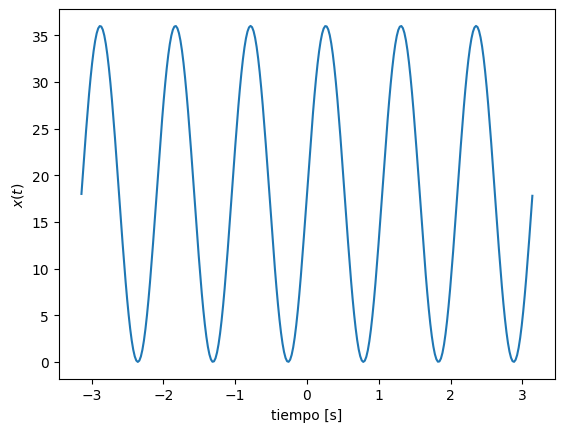

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#simulamos la señal de entrada
ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
T = tf-ti
wo = 2*np.pi/T #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 30*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo
Nm = len(tv)#muestras en el tiempo
xo = abs(6*np.sin(3*tv+np.pi/4))**2 #señal de entrada
plt.plot(tv,xo) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

Dado que $x(t)$ presenta simetría impar, $x(t)=-x(-t)$:


 $$\boxed{a_n = 0 \quad \forall n \in \{1,\dots,N\}}$$

Así:

$$x(t)=\left|6\sin\left(3t+\frac{\pi}{4}\right)\right|^2 = 18+18\sin(6t) = a_0 + \sum_{n=1}^N{b_n\sin(n\omega_0 t)}$$

$a_0$ codifica el nivel DC de la señal, entonces:

$$a_0 = \frac{1}{\pi-(-\pi)}\int_{-\pi}^{\pi}\left(18+18\sin(6t)\right)dt = \frac{18}{2\pi}\int_{-\pi}^{\pi}dt+\frac{18}{2\pi}\int_{-\pi}^{\pi}\sin(6t)dt$$

$$a_0 = \frac{18}{2\pi} t \Big|_{-\pi}^{\pi} - \frac{18}{12\pi}\cos(6t)\Big|_{-\pi}^\pi = \frac{18(\pi-(-\pi))}{2\pi}-\frac{18}{12\pi}\left(\cos(6\pi)-\cos(-6\pi)\right) = \frac{18 \cdot 2\pi}{2\pi} - 0 = 18$$

$$\boxed{a_0 = 18}$$

Por otra parte,

$$b_n = \frac{2}{\pi-(-\pi)}\int_{-\pi}^{\pi}x(t)\sin(n\omega_0 t)dt = \frac{2}{2\pi}\int_{-\pi}^{\pi}\left( 18+18\sin(6t)\right)\sin(n\omega_0 t)dt$$

$$b_n = \frac{18}{\pi}\int_{-\pi}^{\pi}{\sin(n\omega_0 t)dt} + \frac{18}{\pi}\int_{-\pi}^{\pi}{\sin(6t)\sin(n\omega_0 t)dt}$$

Teniendo en cuenta que:


$$\sin(\theta)\sin(\alpha)=\frac{\cos(\theta-\alpha)-\cos(\theta+\alpha)}{2}$$

Entonces:

$$b_n = \frac{18}{\pi}\int_{-\pi}^{\pi}{\sin(n\omega_0 t)dt} + \frac{9}{\pi}\int_{-\pi}^{\pi}{\cos([6-n\omega_0] t)dt} - \frac{9}{\pi}\int_{-\pi}^{\pi}{\cos([6+n\omega_0] t)dt}$$

En este caso: $\boxed{\omega_0 = 2\pi/2\pi = 1 [rad/s]}$

$$b_n = -\frac{18}{\pi n }\cos(nt)\Big|_{-\pi}^{\pi} + \frac{9}{\pi(6-n)}\sin([6-n]t)\Big|_{-\pi}^{\pi} - \frac{9}{\pi(6+n)}\sin([6+n]t)\Big|_{-\pi}^{\pi}$$

$$b_n = -\frac{18}{\pi n }\left(\cos(n\pi)-\cos(-n\pi)\right) + 9\frac{\sin([6-n]\pi)-\sin(-[6-n]\pi)}{\pi(6-n)}-9\frac{\sin([6+n]\pi)-\sin(-[6+n]\pi)}{\pi(6+n)}$$

Recordemos que $\cos(\theta)=\cos(-\theta)$ y $\sin(\theta)=-\sin(-\theta)$, entonces:

$$b_n = -\frac{18}{\pi n }\left(\cos(n\pi)-\cos(n\pi)\right) + 9\frac{\sin([6-n]\pi)+\sin([6-n]\pi)}{\pi(6-n)}-9\frac{\sin([6+n]\pi)+\sin([6+n]\pi)}{\pi(6+n)}$$

$$b_n = 18\frac{\sin([6-n]\pi)}{\pi(6-n)}-18\frac{\sin([6+n]\pi)}{\pi(6+n)}$$


Para $n\neq 6,$ $b_n = 0.$ No obstante, para $n = 6$ debemos calcular el límite y aproximar la indeterminación $\frac{0}{0}$:


$$b_6 = 18\lim_{n\to 6}\frac{\tfrac{d}{dn}\left[\sin([6-n]\pi)\right]}{\tfrac{d}{dn}\left[\pi(6-n)\right]} = 18\lim_{n\to 6}\frac{\cos([6-n]\pi)(-\pi)}{-\pi}$$

$$b_6 = 18\cos(0)= 18$$

$$\boxed{b_6 = 18}$$


$$b_{-6 }= -18\lim_{n\to {-6}}\frac{\tfrac{d}{dn}\left[\sin([6+n]\pi)\right]}{\tfrac{d}{dn}\left[\pi(6+n)\right]} = -18\lim_{n\to -6}\frac{\cos([6+n]\pi)(\pi)}{\pi}$$

$$b_{-6} = -18\cos(0)= -18$$

$$\boxed{b_{-6} = -18}$$

Por consiguiente:

$$\boxed{b_n = \left\{\begin{align} 0 & \quad \forall n \setminus \{-6,6\}\\
18 & \quad n = 6\\
-18 & \quad n = -6\\
\end{align}\right.}$$

$$\boxed{x(t) = a_0+\sum_{n=1}^{N}{b_n \sin(nt)} = a_0+b_6\sin(6t)=18+18\sin(6t)}$$

Para el caso de la serie exponencial compleja:

$$c_0 = a_0 = 18$$

y

$$c_n = \frac{a_n - j b_n}{2}$$

Entonces:

$$\boxed{c_n = \left\{\begin{align}
9j & \quad n = -6\\
18 & \quad n = 0\\
-9j & \quad n = 6\\
0 & \quad \forall n \setminus \{-6,0,6\}
\end{align}\right.}$$

y

$$\boxed{x(t) = \sum_{n=-N}^{N}{c_n e^{j n t}}}$$


$$x(t) = c_{-6}e^{-j6t} + c_{0}e^{0} + c_{6}e^{j6t}$$

$$x(t)= 9j(\cos(6t)-j\sin(6t))+18-9j(\cos(6t)+j\sin(6t)) $$

$$\boxed{x(t) = 9j\cos(6t)+9\sin(6t))+18-9j\cos(6t)+9\sin(6t)=18+18\sin(6t)}$$


In [ ]:
#se presenta la simulación del espectro y la reconstrucción
#construir bases serie exponencial
N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#espectro de la señal - serie exponencial
#calcular espectro -> cambiar según la señal estudiada
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn[N] = 18 # nivel dc C_0
Cn[N-6] = 1j*9
Cn[N+6] = -1j*9

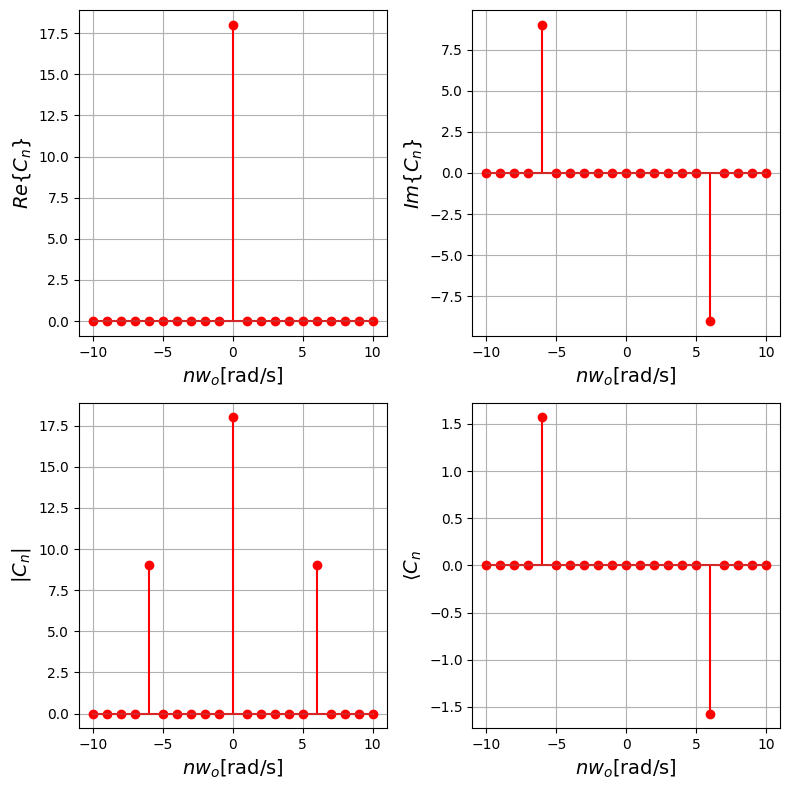

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Encontramos la potencia de la señal para calcular el error relativo:


$$e_r[\%] = \frac{\bar{P}_e}{\bar{P_x}} 100[\%] = \left(1-\frac{\sum^N_{n=-N}|c_n|^2P_n}{\bar{P}_x}\right)100[\%]$$

En este caso, la potencia de $x(t)$ se cálcula como:

\begin{equation}
P_x = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}{|x(t)^2|dt} = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}{|18+18\sin(6t)|^2dt} = \frac{1}{2\pi}\left(18^2\int\limits_{-\pi}^{\pi}dt + 2 \cdot 18^2 \int\limits_{-\pi}^{\pi}\sin(6t)dt + 18^2\int\limits_{-\pi}^{\pi}\sin^2(6t)dt\right)
\end{equation}


$$ P_x = \frac{1}{2\pi}\left(18^2(2\pi) + 2\cdot18^2(-\cos(6\pi)+\cos(-6\pi))+\frac{18^2}{2}\left(\int\limits_{-\pi}^{\pi}dt - \int\limits_{-\pi}^{\pi}\cos(12t)dt\right)\right)$$

$$P_x = \frac{1}{2\pi}\left(18^2(2\pi) +\frac{18^2(2\pi)}{2}-\frac{18^2}{2}(\sin(24\pi)-\sin(-24\pi))\right)$$

$$\boxed{P_x = 18^2 \left(\frac{3\pi}{2\pi}\right) = \frac{3}{2}18^2}$$

para el caso de la serie exponencial de Fourier $P_n=1$, por consiguiente:

\begin{equation}
E_r[\%] = 1 - \left(\frac{1}{P_x}\sum\limits_{n=-N}^N{|c_n|^2}\right).
\end{equation}

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


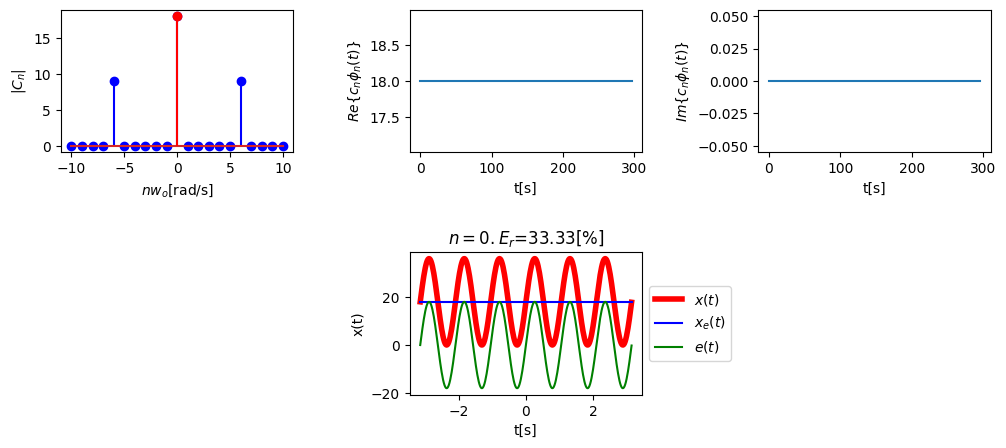

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#reconstrucción
Px = (3/2)*(18**2)
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$n=%d. E_r$=%.2f[%%]' % (n,100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

anim

# Punto 2

Sea la señal portadora $c(t) = A_c\cos(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde YouTube, $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 0.5). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.

## Solución:

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathscr{F}\{y(t)\} = \mathscr{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathscr{F}\{c(t)\}+\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier):

$$C(\omega) = \mathscr{F}\{c(t)\} = \mathscr{F}\{A_c\cos(2\pi F_c t)\} = A_c\mathscr{F}\left\{\frac{e^{j2\pi F_ct}+e^{-j2\pi F_ct}}{2}\right\}$$

y

$$\mathscr{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = A_c\pi(\delta(\omega - 2\pi F_c)+\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathscr{F}\{m(t)A_c\cos(2\pi F_c t)\} = \mathscr{F}\{m(t)\cos(2\pi F_c t)\} = \mathscr{F}\left\{\frac{m(t)e^{j2\pi F_ct}+m(t)e^{-j2\pi F_ct}}{2}\right\}$$

teniendo en cuenta que:

$$\mathscr{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$\boxed{\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\} = \frac{1}{2}\left(M(\omega - 2\pi F_c)+M(\omega + 2\pi F_c)\right)}$$


Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = A_c\pi(\delta(\omega - 2\pi F_c)+\delta(\omega + 2\pi F_c)) + \frac{1}{2}\left(M(\omega - 2\pi F_c)+M(\omega + 2\pi F_c)\right)}$$

In [ ]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 7.6 MB/s eta 0:00:00
  Created w

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2023-10-31 14:20:13--  https://docs.google.com/uc?export=download&confirm=&id=1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-
Resolving docs.google.com (docs.google.com)... 172.217.204.101, 172.217.204.113, 172.217.204.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4vr9vt69oi1e9l44qos8768539lj0apg/1698762000000/09173029842254050324/*/1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-?e=download&uuid=921ad9bf-b38e-4ba7-b7c7-c7a4aaf38ddd [following]
--2023-10-31 14:20:13--  https://doc-0k-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4vr9vt69oi1e9l44qos8768539lj0apg/1698762000000/09173029842254050324/*/1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-?e=download&uuid=921ad9bf-b38e-4ba7-b7c7-c7a4aaf38ddd
Resolving doc-0k-0s-docs.googleusercontent.com (doc-0k-0s-docs.googleusercontent.com)... 173.194.210.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)

In [ ]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion
n = 0
print(f"video {n+1} de {N}")
print(f"link: {X.loc[n,'link']}\n")
print(f"band: {X.loc[n,'band']}\n")
print(f"type: {X.loc[n,'type']}\n")
#ruta video n-th
name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
#descargar mp3 desde youtube
download_ytvid_as_mp3(X.loc[n,'link'],name_)
#convertir a .wav
subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                name_+'.wav'])

video 1 de 16
link: https://www.youtube.com/watch?v=WdoXZf-FZyA&ab_channel=Megadeth-Topic

band: megadeth

type: metal

[youtube] Extracting URL: https://www.youtube.com/watch?v=WdoXZf-FZyA&ab_channel=Megadeth-Topic
[youtube] WdoXZf-FZyA: Downloading webpage
[youtube] WdoXZf-FZyA: Downloading android player API JSON
[youtube] WdoXZf-FZyA: Downloading ios player API JSON
[youtube] WdoXZf-FZyA: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=WdoXZf-FZyA
[youtube] WdoXZf-FZyA: Downloading webpage
[youtube] WdoXZf-FZyA: Downloading android player API JSON
[youtube] WdoXZf-FZyA: Downloading ios player API JSON
[youtube] WdoXZf-FZyA: Downloading m3u8 information
[info] WdoXZf-FZyA: Downloading 1 format(s): 251
[download] Destination: results/megadeth_0_1.mp3
[download] 100% of    3.75MiB in 00:00:00 at 24.37MiB/s  
Download complete... results/megadeth_0_1.mp3


0

In [ ]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['megadeth_0_1.wav']

In [ ]:
!pip install soundfile #instalar sondfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([20])
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

0 lectura: megadeth_0_1.wav; segundo 20:25; tipo música [1.]


(1, 240000, 2)

In [ ]:
from IPython.display import Audio #reproducir segmento
Audio(x_t[0].T,rate=fs)

In [ ]:
#tomamos canal 1 para generar la modulación
xm = x_t[0,:,0]
xm.shape

(240000,)

In [ ]:
Fc = 15000 #frecuencia de portadora
t = np.arange(0,ts,1/fs) #vector del tiempo
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(xm))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(Ac)

1.0


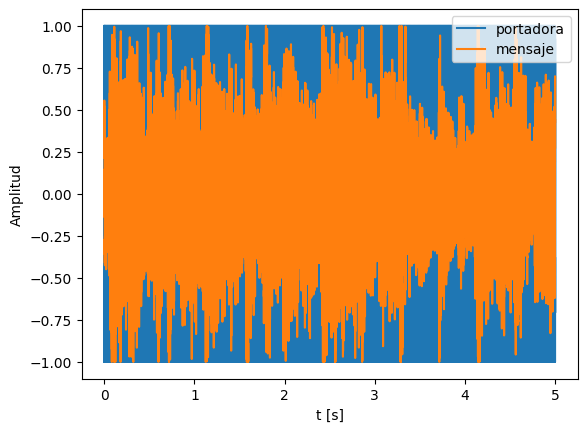

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,xm,label='mensaje')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [ ]:
Audio(c,rate=fs) #reproducir portadora

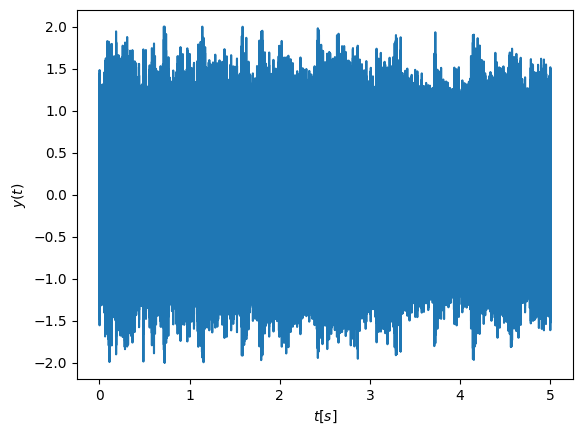

In [ ]:
y = (1+xm/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

In [ ]:
Audio(y,rate=fs) #reproducir modulada

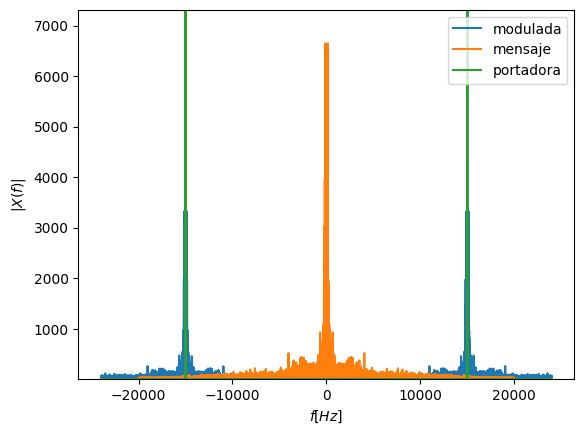

In [ ]:
#calculo de espectros
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(xm)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/fs)

plt.plot(vfre,abs(Xfy),label='modulada')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

#Punto 3

Sea la base de datos para el monitoreo de condición (fallos) en rodamientos a partir del análisis de vibraciones descrita en [Case Western Reserve Experiments](https://engineering.case.edu/bearingdatacenter). Las señales fueron adquiridas para las siguientes condiciones (clases): i) Normal bearing (Nor), fault in the internal train (IR1), fault in the external train (IR2), and fault in the rolling element-ball (BE). Además, los fallos se generaron para tres niveles de severidad (profundidad): 0.007′′, 0.014′′, and 0.021′′ y tres velocidades de operación (1730, 1750, 1772, and 1797 [rpm]). Los datos fueron adquiridos a 12 kHz. Por consiguiente, se tienen los siguientes parámetros de estudio: $F_s=12k$ [Hz] cantidad de puntos en el tiempo $4096$ y cantidad de clases $C = 10$.

Grafique la señal promedio de cada fallo en el tiempo y en la frecuencia.

Utilizando la transformada rápida de Fourier diseñe y construya un detector fallos en rodamientos a partir de señales de vibración y sus etiquetas en los arreglos Xtrain y Ytrain (ver [cuaderno de apoyo](https://github.com/amalvarezme/SenalesSistemas/blob/master/3_SerieyTransformadaFourier/WesterP2_2023_2.ipynb)). Genere las predicciones de fallos para el arreglo Xtest.


#Solución:

In [ ]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-10-31 14:20:37--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 172.217.204.101, 172.217.204.113, 172.217.204.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gj11fbkn5a6pprd3mgjjmhua5hhs4g6p/1698762000000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=2c907751-3a00-4b20-80ba-f85369875e98 [following]
--2023-10-31 14:20:37--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gj11fbkn5a6pprd3mgjjmhua5hhs4g6p/1698762000000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=2c907751-3a00-4b20-80ba-f85369875e98
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 173.194.210.

In [ ]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

In [ ]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [ ]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000) 


In [ ]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape

(840, 2001)

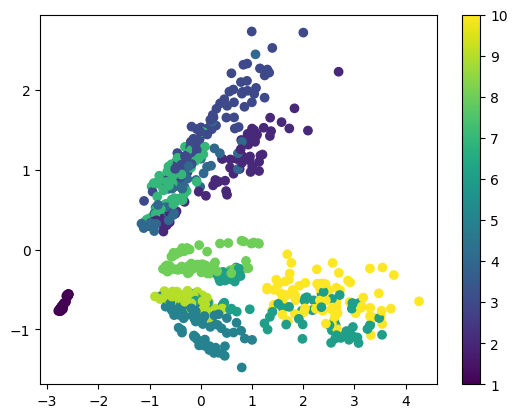

In [ ]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

In [ ]:
np.unique(Ytrain)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

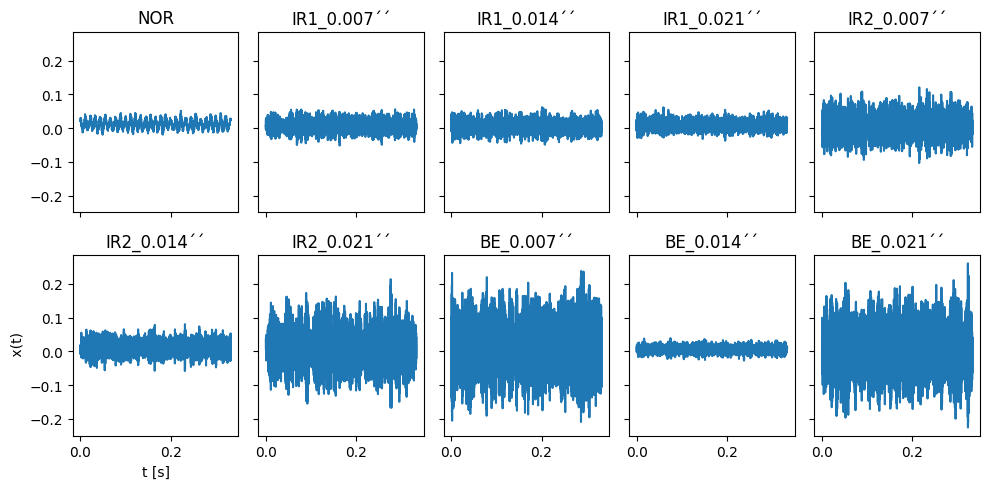

In [ ]:
#graficar señales en tiempo y en frecuencia desde Xtrain y Ytrain

nrows = 2
ncols = 5

#grafica en el tiempo señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(tv,Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('t [s]')
ax[1,0].set_ylabel(' x(t)')
plt.tight_layout()
plt.show()

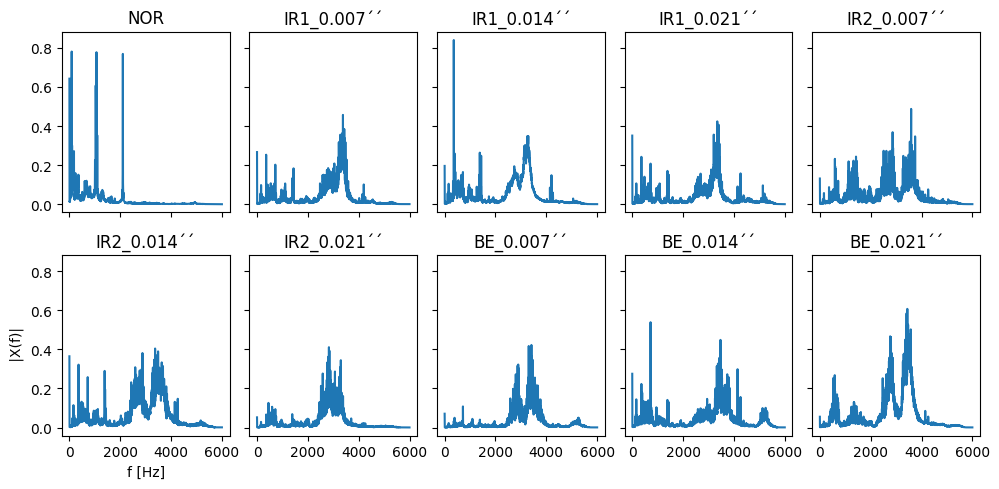

In [ ]:
#grafica frecuencia - señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(vf,abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('f [Hz]')
ax[1,0].set_ylabel(' |X(f)|')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.spatial.distance import cdist
#fft Xtest
Xwt = (abs(np.fft.rfft(Xtest))) # FFT
Xwt_ = sca_.fit_transform(Xwt.T).T

Dtr_te = cdist(Xw_,Xwt_)
Dtr_te.shape #distancias espectros Xtrain vs Xtest

(840, 360)

In [ ]:
ind_ = np.argmin(Dtr_te,axis=0)
ind_.shape

(360,)

In [ ]:
Ytest_e = Ytrain[ind_]

In [ ]:
from sklearn.metrics import accuracy_score

print(f"ACC={accuracy_score(Ytest,Ytest_e)}")


ACC=1.0
